<a href="https://colab.research.google.com/github/vpaluparthi/ML_Assignment1/blob/main/Group244_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 1

Assignment Topic: Build and Evaluate Machine Learning model for analysis of Breast Cancer dataset.

Names:
P. Vijaya Kumar (BITS ID: 2020FC04388)
Archana C (BITS ID: )
Anirudh Kanukanti (BITS ID: )

Group: 244



# Step 1: Initialization

# A.	Import the required libraries

# B.	Download the dataset







In [274]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id':'1AnRf3cl-MflHd4JVK07Az3UdvemNRU4a'})
fileDownloaded.GetContentFile('breast-cancer-wisconsin.csv.csv')
data = pd.read_csv('breast-cancer-wisconsin.csv.csv', delimiter=',')
#data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
#                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses','Class']
data = data.drop(columns=['Sample code number'])

# Step 2:	Data Visualization and Exploration

# A.	Print the description and shape of the dataset.

# B.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [275]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# C.	Try exploring the data and see what insights can be drawn from the dataset.
# D.	Provide appropriate visualization to get an insight about the dataset.

Plotting a box chart to see how the values of the features are spread out

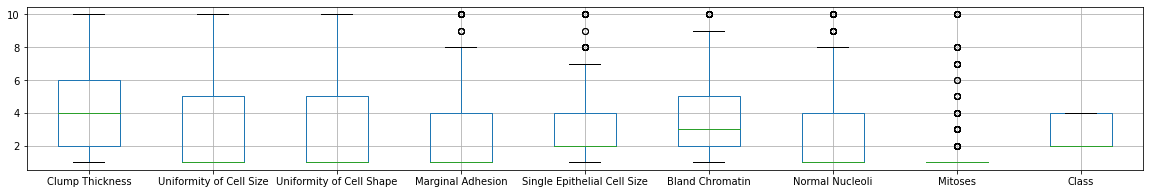

In [276]:
%matplotlib inline

data.boxplot(figsize=(20,3))

Check how the clump thickness values are distributed

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump Thickness, dtype: int64

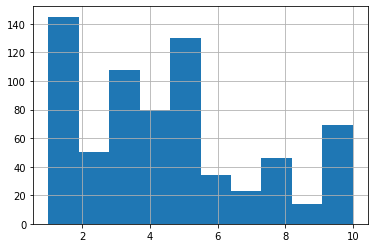

In [277]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

# 3.	Data Pre-processing and cleaning
# A.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc.
# B. Applying Feature Transformation techniques


> Dropping Class column since it is output column

> Replacing "?" characters in data with n.NaN. Replacing these missing values with median value

> Filling missing values with median value in Bare Nuclei column





In [278]:
#data = data.drop(['Class'],axis=1)

data = data.replace('?',np.NaN)

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [279]:
bare_nuclei_data = data['Bare Nuclei']

print('Before replacing missing values:')
print(bare_nuclei_data[20:25])
bare_nuclei_data = bare_nuclei_data.fillna(bare_nuclei_data.median())
bare_nuclei_data = pd.to_numeric(bare_nuclei_data)
print('\nAfter replacing missing values:')
print(bare_nuclei_data[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


In [280]:
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data
data2['Bare Nuclei'] = bare_nuclei_data
data2 = data2.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 699


In [281]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.798376,0.640688,0.371049,1.405526,1.377569
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.970088,1.460910,2.335921,-0.343666,1.377569
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666,-0.724878
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,-0.686488,1.460910,0.043570,-0.343666,1.377569
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666,-0.724878


In [282]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 0


In [283]:
dups = data2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data2.loc[[11,28]]

Number of duplicate rows = 242


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1.0,2,1,1,2
28,2,1,1,1,2,1.0,2,1,1,2


Removing duplicate rows

In [284]:
data2.drop_duplicates()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1.0,2,1,2,2
694,3,1,1,1,3,2.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [285]:
sample = data2.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
370,4,3,2,1,3,1.0,2,1,1,2
285,8,10,10,10,8,10.0,10,7,3,4
640,4,1,1,3,2,1.0,1,1,1,2


In [286]:
sample = data2.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1.0,1,1,1,2
417,1,1,1,1,2,1.0,2,1,1,2
606,4,1,1,2,2,1.0,1,1,1,2
349,4,2,3,5,3,8.0,7,6,1,4
134,3,1,1,1,3,1.0,2,1,1,2
502,4,1,1,2,2,1.0,2,1,1,2
117,4,5,5,10,4,10.0,7,5,8,4


In [287]:
sample = data2.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1.0,7,1,1,2
235,3,1,4,1,2,1.0,3,1,1,2
72,1,3,3,2,2,1.0,7,2,1,2
645,3,1,1,1,2,1.0,2,1,1,2
144,2,1,1,1,2,1.0,2,1,1,2
129,1,1,1,1,10,1.0,1,1,1,2
583,3,1,1,1,2,1.0,1,1,1,2


In [288]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

s

# 3 C .	Correlational analysis on the dataset and visualization


In [289]:
# Check the correlation in the data
data.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


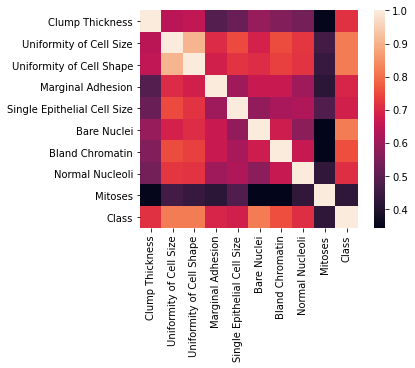

In [290]:
sns.heatmap(data.corr(), square = True)

# 3 Applying Feature Reduction techniques
# Features "Uniformity of Cell Size" and "Uniformity of Cell Shape" are highly correlated. So dropping the feature "Uniformity of Cell Size"



In [291]:
data2.drop(['Uniformity of Cell Size'],axis=1)

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1.0,3,1,1,2
1,5,4,5,7,10.0,3,2,1,2
2,3,1,1,2,2.0,3,1,1,2
3,6,8,1,3,4.0,3,7,1,2
4,4,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,3,2.0,1,1,1,2
695,2,1,1,2,1.0,1,1,1,2
696,5,10,3,7,3.0,8,10,2,4
697,4,6,4,3,4.0,10,6,1,4


# 4.	Data Preparation

In [292]:
features = ['Clump Thickness', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses']
X = data2[features]
# Label selection
y = data2.Class
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y)

# Part B 1. Model Building

# Model 1: Using RandomForestRegressor


In [294]:
# Loop is used to get more generalized result
total_sum = []
for i in range(10):
 # Hypertuning of parameters for better prediction
 forest_model = RandomForestRegressor(n_estimators=100, max_features=3, min_samples_leaf=10)
 forest_model.fit(X, y)
 # For testing purpose
 #forest_model.fit(train_X, train_y)
 # Pass values to get prediction for ratings
 # 1st value = Clump Thickness
 # 2nd value = Uniformity of Cell Shape
 # 3rd value = Marginal Adhesion
 # 4th value = Single Epithelial Cell Size
 # 5th value = Bare Nuclei
 # 6th value = Bland Chromatin
 # 7th value = Normal Nucleoli
 # 8th value = Mitoses
 
 forest_pred = forest_model.predict([[10,7,3,8,5,7,4,3]])
 total_sum.append(forest_pred)
 # For testing purpose
 #forest_pred = forest_model.predict(test_X)
 #print(mean_absolute_error(forest_pred, test_y))

 print(round(np.median(total_sum)))

4
4
4
4
4
4
4
4
4
4
